In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as sla

## Task 2

In [7]:
n = 10
ex = np.ones(n)
A = sp.sparse.spdiags(np.vstack((-ex, 2 * ex, -ex)), [-1, 0, 1], n, n, 'csr')
rhs = np.random.normal(size=n)

cond = [48.37415008]
q = [0.95949297]


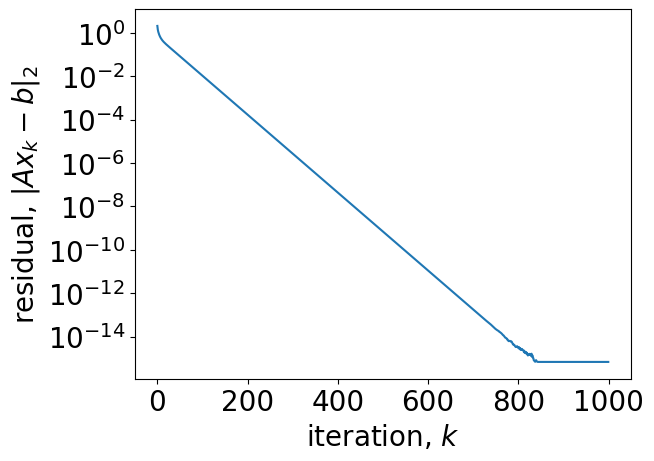

In [9]:
# richardson iteration
lam_max = sla.eigsh(A, k=1, which='LA', return_eigenvectors=False)
lam_min = sla.eigsh(A, k=1, which='SA', return_eigenvectors=False)
tau = 2.0 / (lam_max + lam_min)

n_iters = 1000
x = np.zeros(n)
res = []

for i in range(n_iters):
    r = A.dot(x) - rhs
    x = x - tau * r
    res.append(np.linalg.norm(r))

plt.plot(res)
plt.yscale('log')
plt.xlabel("iteration, $k$", fontsize=20)
plt.ylabel("residual, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cond_number = lam_max.real / lam_min.real
print(f"cond = {cond_number}")
print(f"q = {(cond_number - 1) / (cond_number + 1)}")